### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

项目参考：https://pythonfordatascience.org/paired-samples-t-test-python/

(1) 我们的自变量是什么？因变量是什么？

自变量是文字与打印颜色分别为一致和不一致，因变量是参与者完成对应条件测试使用的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

1）假设集：

    H0:μd = 0（零假设：文字与打印颜色分别在不一致和一致条件下，参与者完成对应条件测试使用的时间总体的平均差为0）

    H1:μd ≠ 0（对立假设：文字与打印颜色分别在不一致和一致条件下，参与者完成对应条件测试使用的时间总体的平均差不为0）

2）执行α= 0.05配对样本T双尾检验

3）配对样本T检验是主要用于样本含量较小（n<30）,且样本实验数据为同一位参与者分别接受两种不同的处理后产生2组实验结果，2组实验差异均值是否等于目标值的假设检验。

4）配对样本T检验假设：

    1）因变量数据是连续的(在一个区间或比例尺上)

    2）因变量应当近似正态分布

        -1 应当对2组差异值进行正态分布检验

        -2 只要不是严重违反正态分布的要求条件，则认为结果有效

    3）因变量不应该包括任何离群值

5）选择执行α= 0.05配对样本T双尾检验的原因：

    1) 样本通过重复的实验获取到了不同的数据集且总体均值和标准偏差未知。            
    2）该数据集为同一位参与者分别接受文字与打印颜色分别在不一致和一致条件下，完成对应条件测试使用的时间的2组结果。
    3）该数据集样本含量较小 n = 24 < 30

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv("stroopdata.csv")
df['difference'] = df['Incongruent'] - df['Congruent']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
difference     24 non-null float64
dtypes: float64(3)
memory usage: 656.0 bytes


In [2]:
df.describe()

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


集中趋势测量：

    1)文字与打印颜色在一致条件下的样本平均值为14.05s,样本中位数为14.35s；
    2)文字与打印颜色在不一致条件下的样本平均值为22.01s,样本中位数为21.01s；

变异测量：

    1）文字与打印颜色在一致条件下的样本最大值和最小值之间的差为13.60s；样本标准差为3.56；
    2）文字与打印颜色在不一致条件下的样本最大值和最小值之间的差为19.60s；样本标准差为4.80；

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

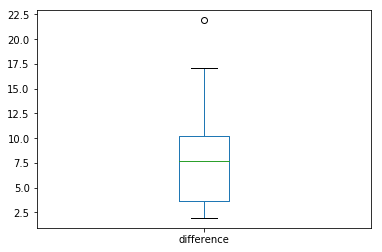

In [3]:
#假设检查：离群值检查
df['difference'].plot(kind='box')

通过上述观察发现Incongruent组存在离群值，需要剔除>30的值。

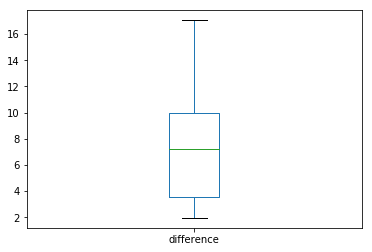

In [5]:
#剔除Incongruent组离群值
df = df[df['difference'] < 20]
df['difference'].plot(kind='box')

In [12]:
#计算样本数量
df.shape[0]

23

通过上述观察发现Congruent组存在离群值，需要剔除>20的值。

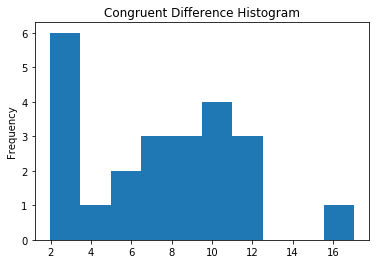

In [6]:
#假设检查：配对组差值服从正态分布
df['difference'] = df['Incongruent'] - df['Congruent']
df['difference'].plot(kind='hist', title= 'Congruent Difference Histogram')

经过上述观察，配对组差值在5-10之间近似服从正态分布，但需要进一步采用Q-Q Plot验证。

Text(0.5,1,'Congruent Difference Q-Q Plot')

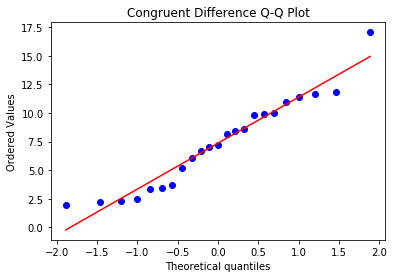

In [7]:
#假设检查：配对组差值服从正态分布-Q-Q Plot
stats.probplot(df['difference'], plot= plt)
plt.title('Congruent Difference Q-Q Plot')

经过上述观察，较多蓝点存在于红线上，但仍有部分蓝点位于红线下。因此配对组差值是否服从正态分布需要进一步采用shapiro检验验证。

In [9]:
#假设检查：配对组差值服从正态分布-shapiro检验
stats.shapiro(df['difference'])

(0.9442834854125977, 0.2218858301639557)

shapiro检验的零假设为样本数据来自正态分布，且p = 0.22 >0.05,所以拒绝零假设失败。因此因变量服从正态分布的假设成立。

由于配对样本T双尾检验假设的前提条件为：

    1）因变量数据是连续的： 
    2）因变量应当近似正态分布
    3）因变量不应该包括任何离群值
上述条件均成立，因此可以采用配对样本T双尾检验假设。

In [10]:
#计算配对样本T检验假设的统计量及p值
stats.ttest_rel(df['Congruent'],df['Incongruent'],axis=0,nan_policy='omit')

Ttest_relResult(statistic=-8.9613003726325839, pvalue=8.5374117567205533e-09)

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

1）置信水平为：1-α= 95%；
2) 显著性水平:α= 5% > pvalue;
3）关键统计值：t = -8.96；
4) 自由度：n = 23 -1 =22
5) t临界值 t = 2.074 < |-8.96|
由于|关键统计值| > t临界值，且pvalue < 0.05；所以拒绝零假设。文字与打印颜色分别在不一致和一致条件下，参与者完成对应条件测试使用的时间总体的平均差不为0。即文字与打印颜色分别在不一致和一致条件下，参与者完成对应条件测试使用的时间存在显著差异。